#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


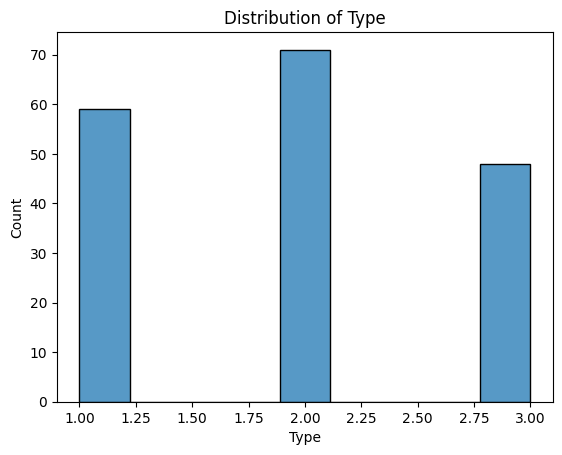

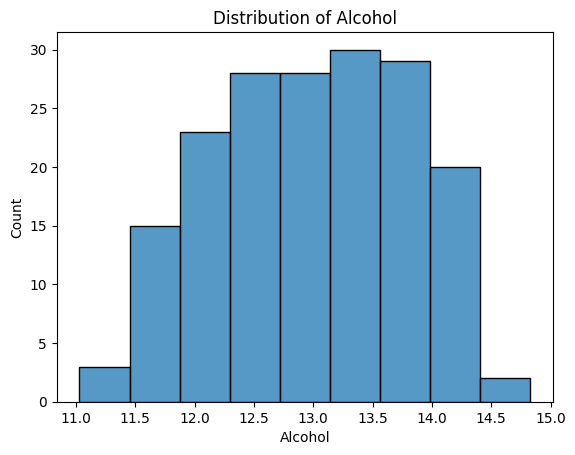

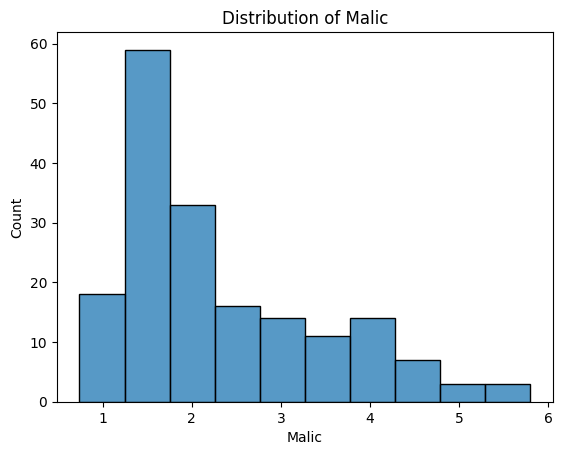

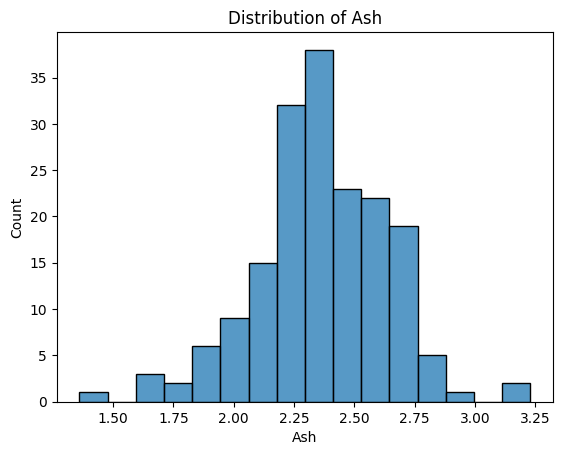

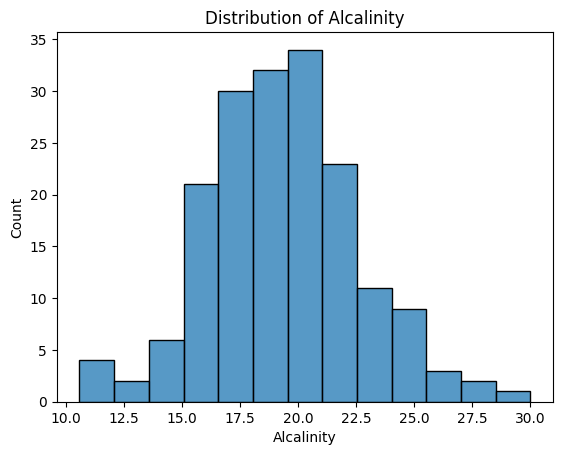

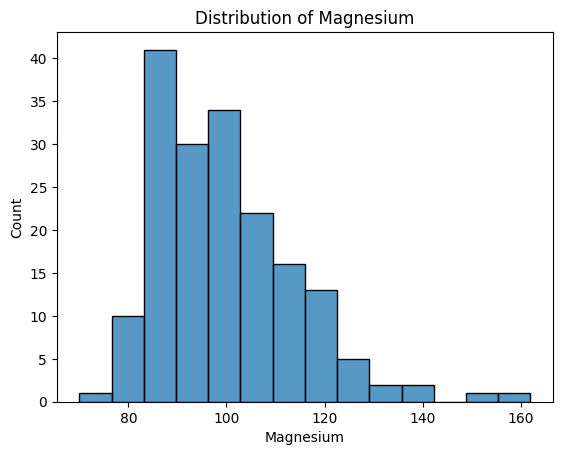

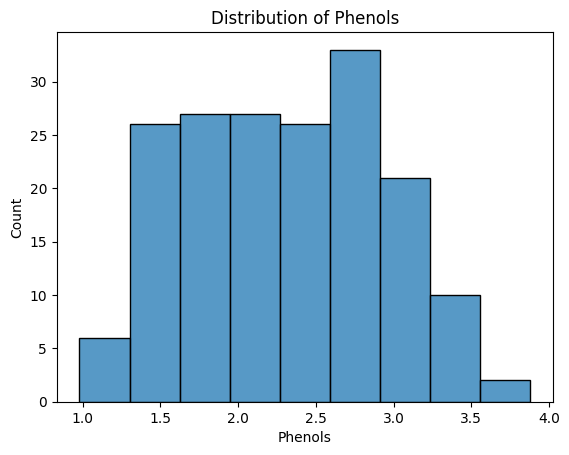

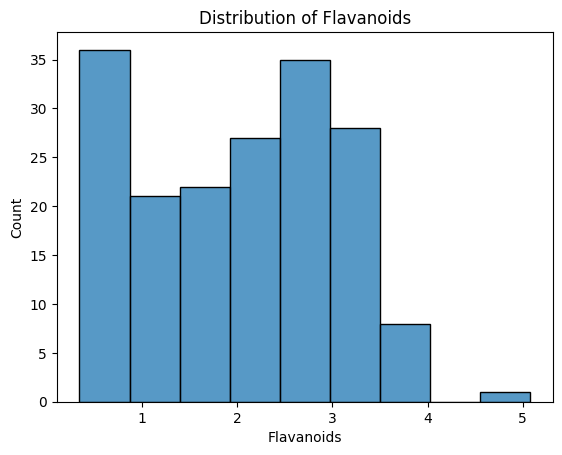

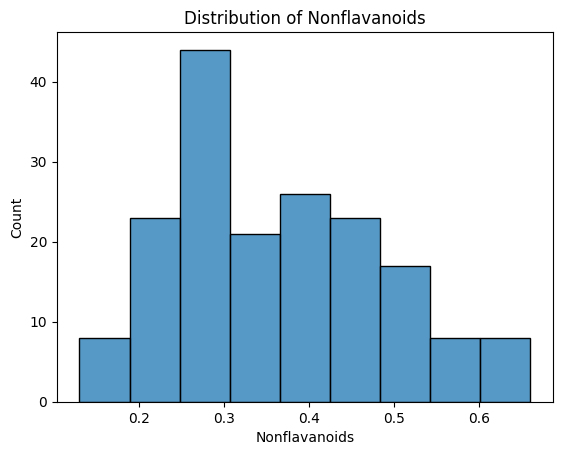

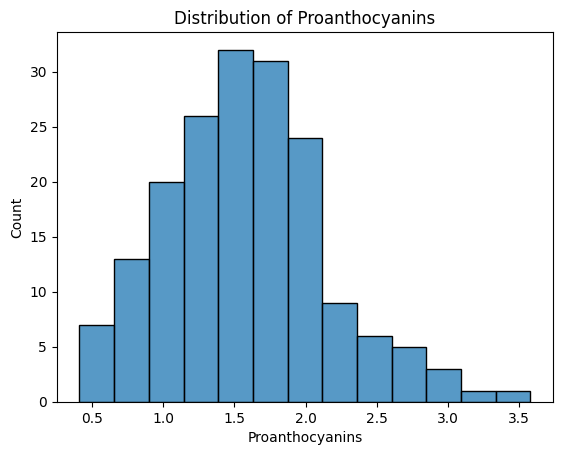

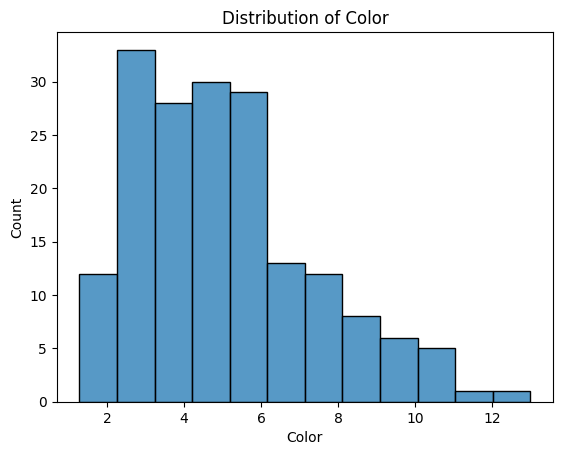

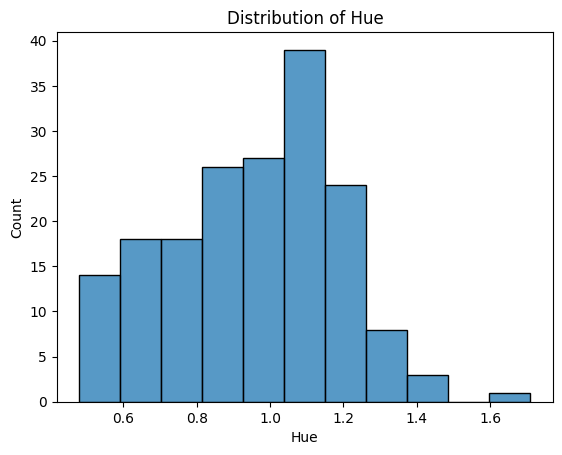

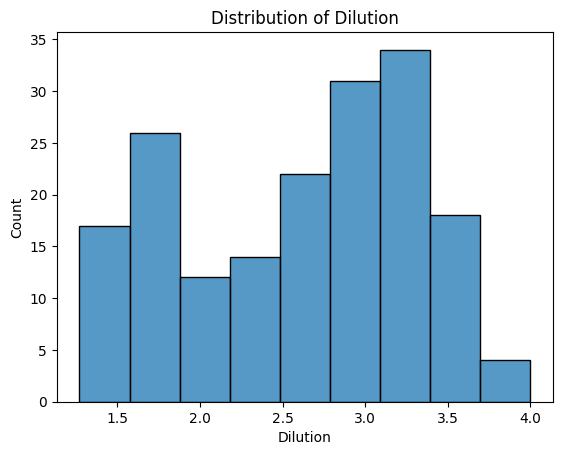

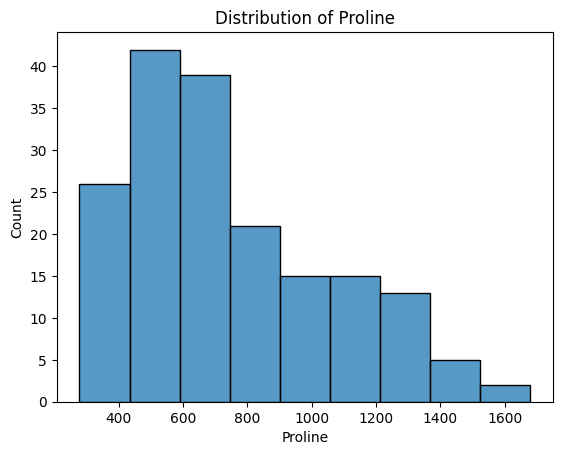

In [8]:
#Distribution of Features
for column in data.columns:
  sns.histplot(data[column])
  plt.title(f'Distribution of {column}')
  plt.show()

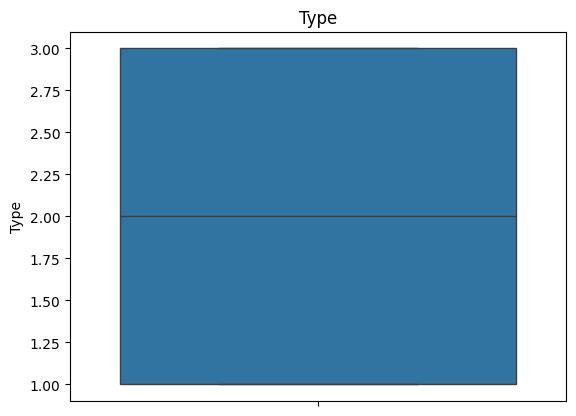

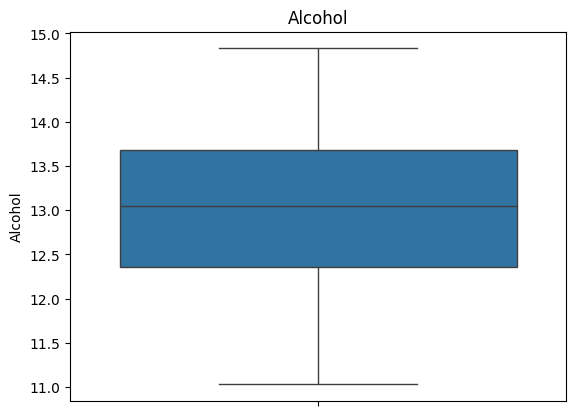

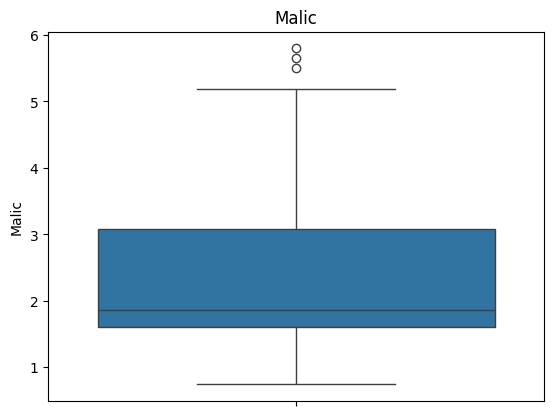

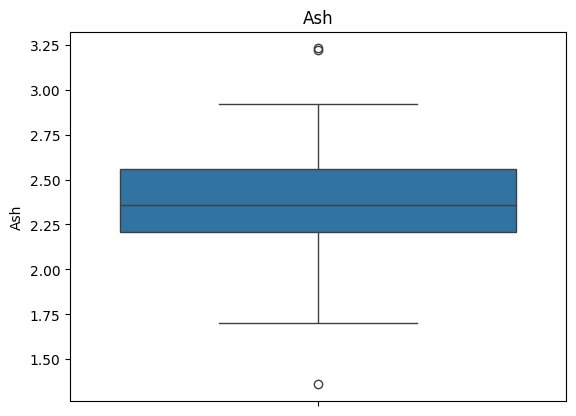

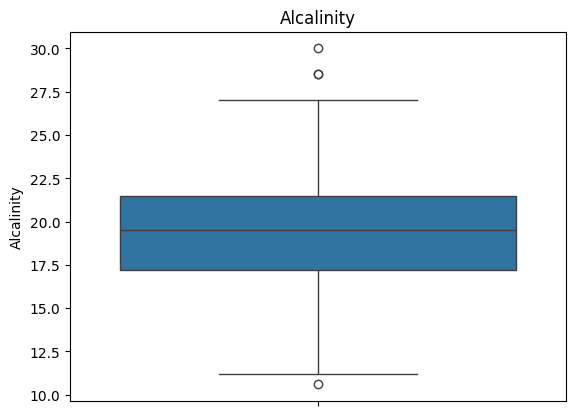

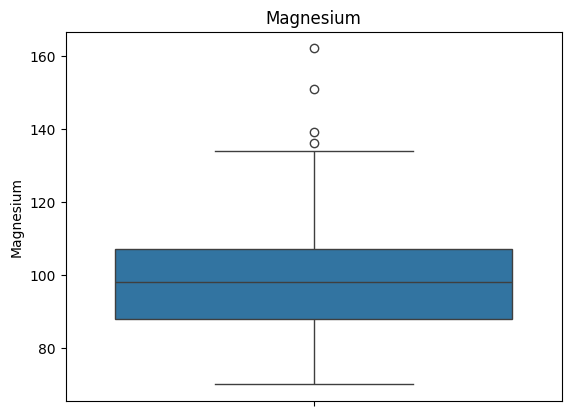

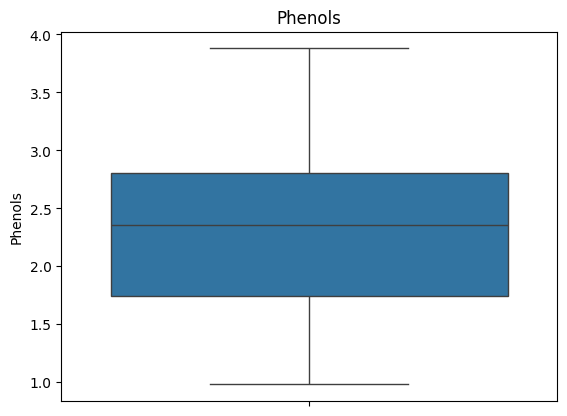

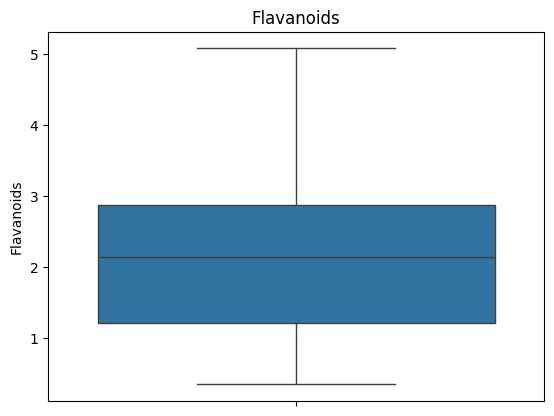

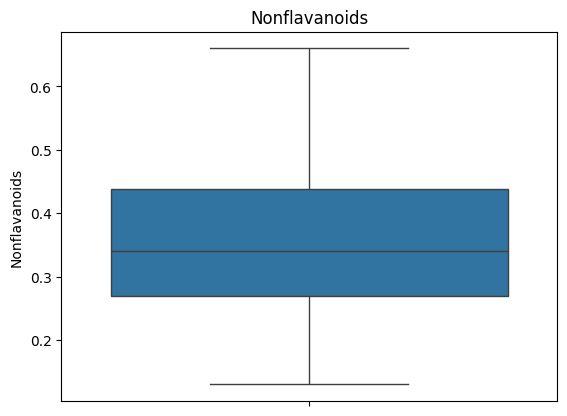

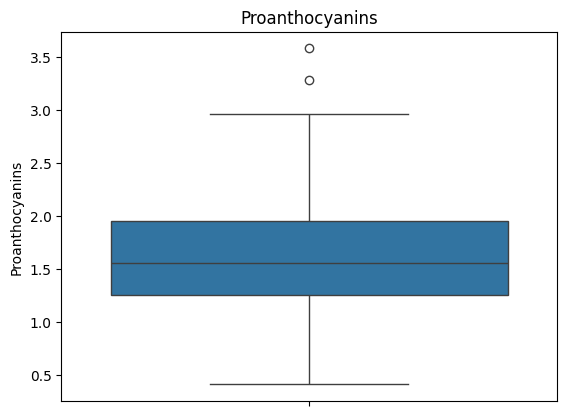

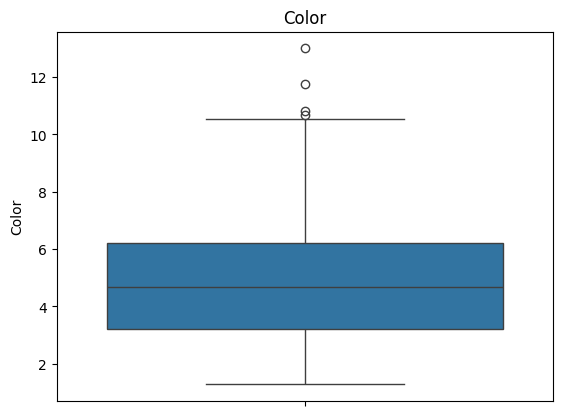

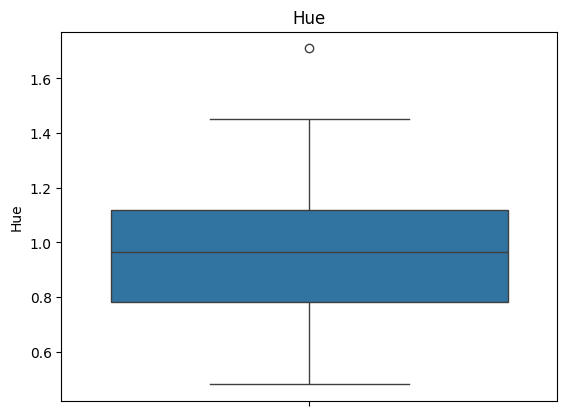

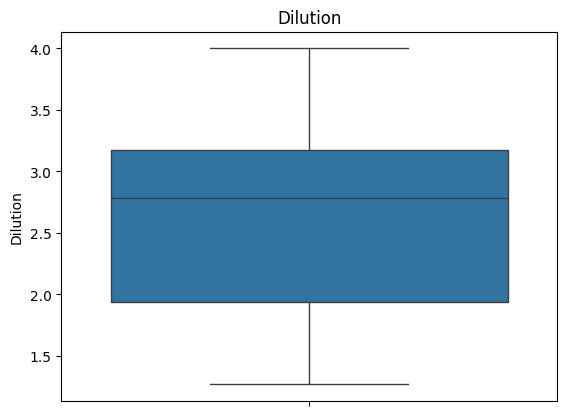

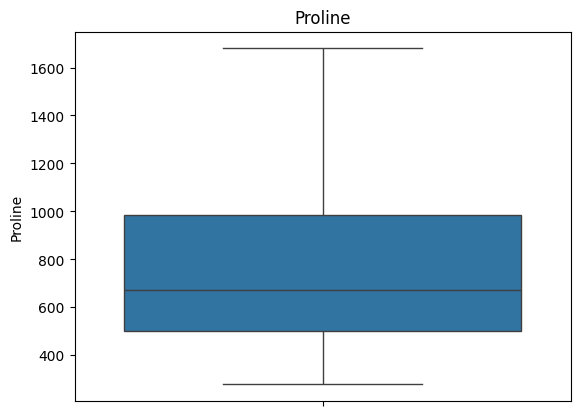

In [9]:
# Boxplot for each Feature
for column in data.columns:
    sns.boxplot(data[column])
    plt.title(column)
    plt.show()

<Axes: >

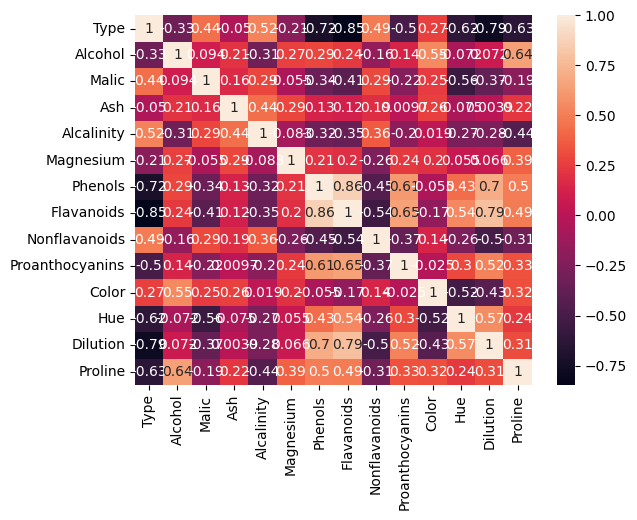

In [10]:
sns.heatmap(data.corr(),annot=True)

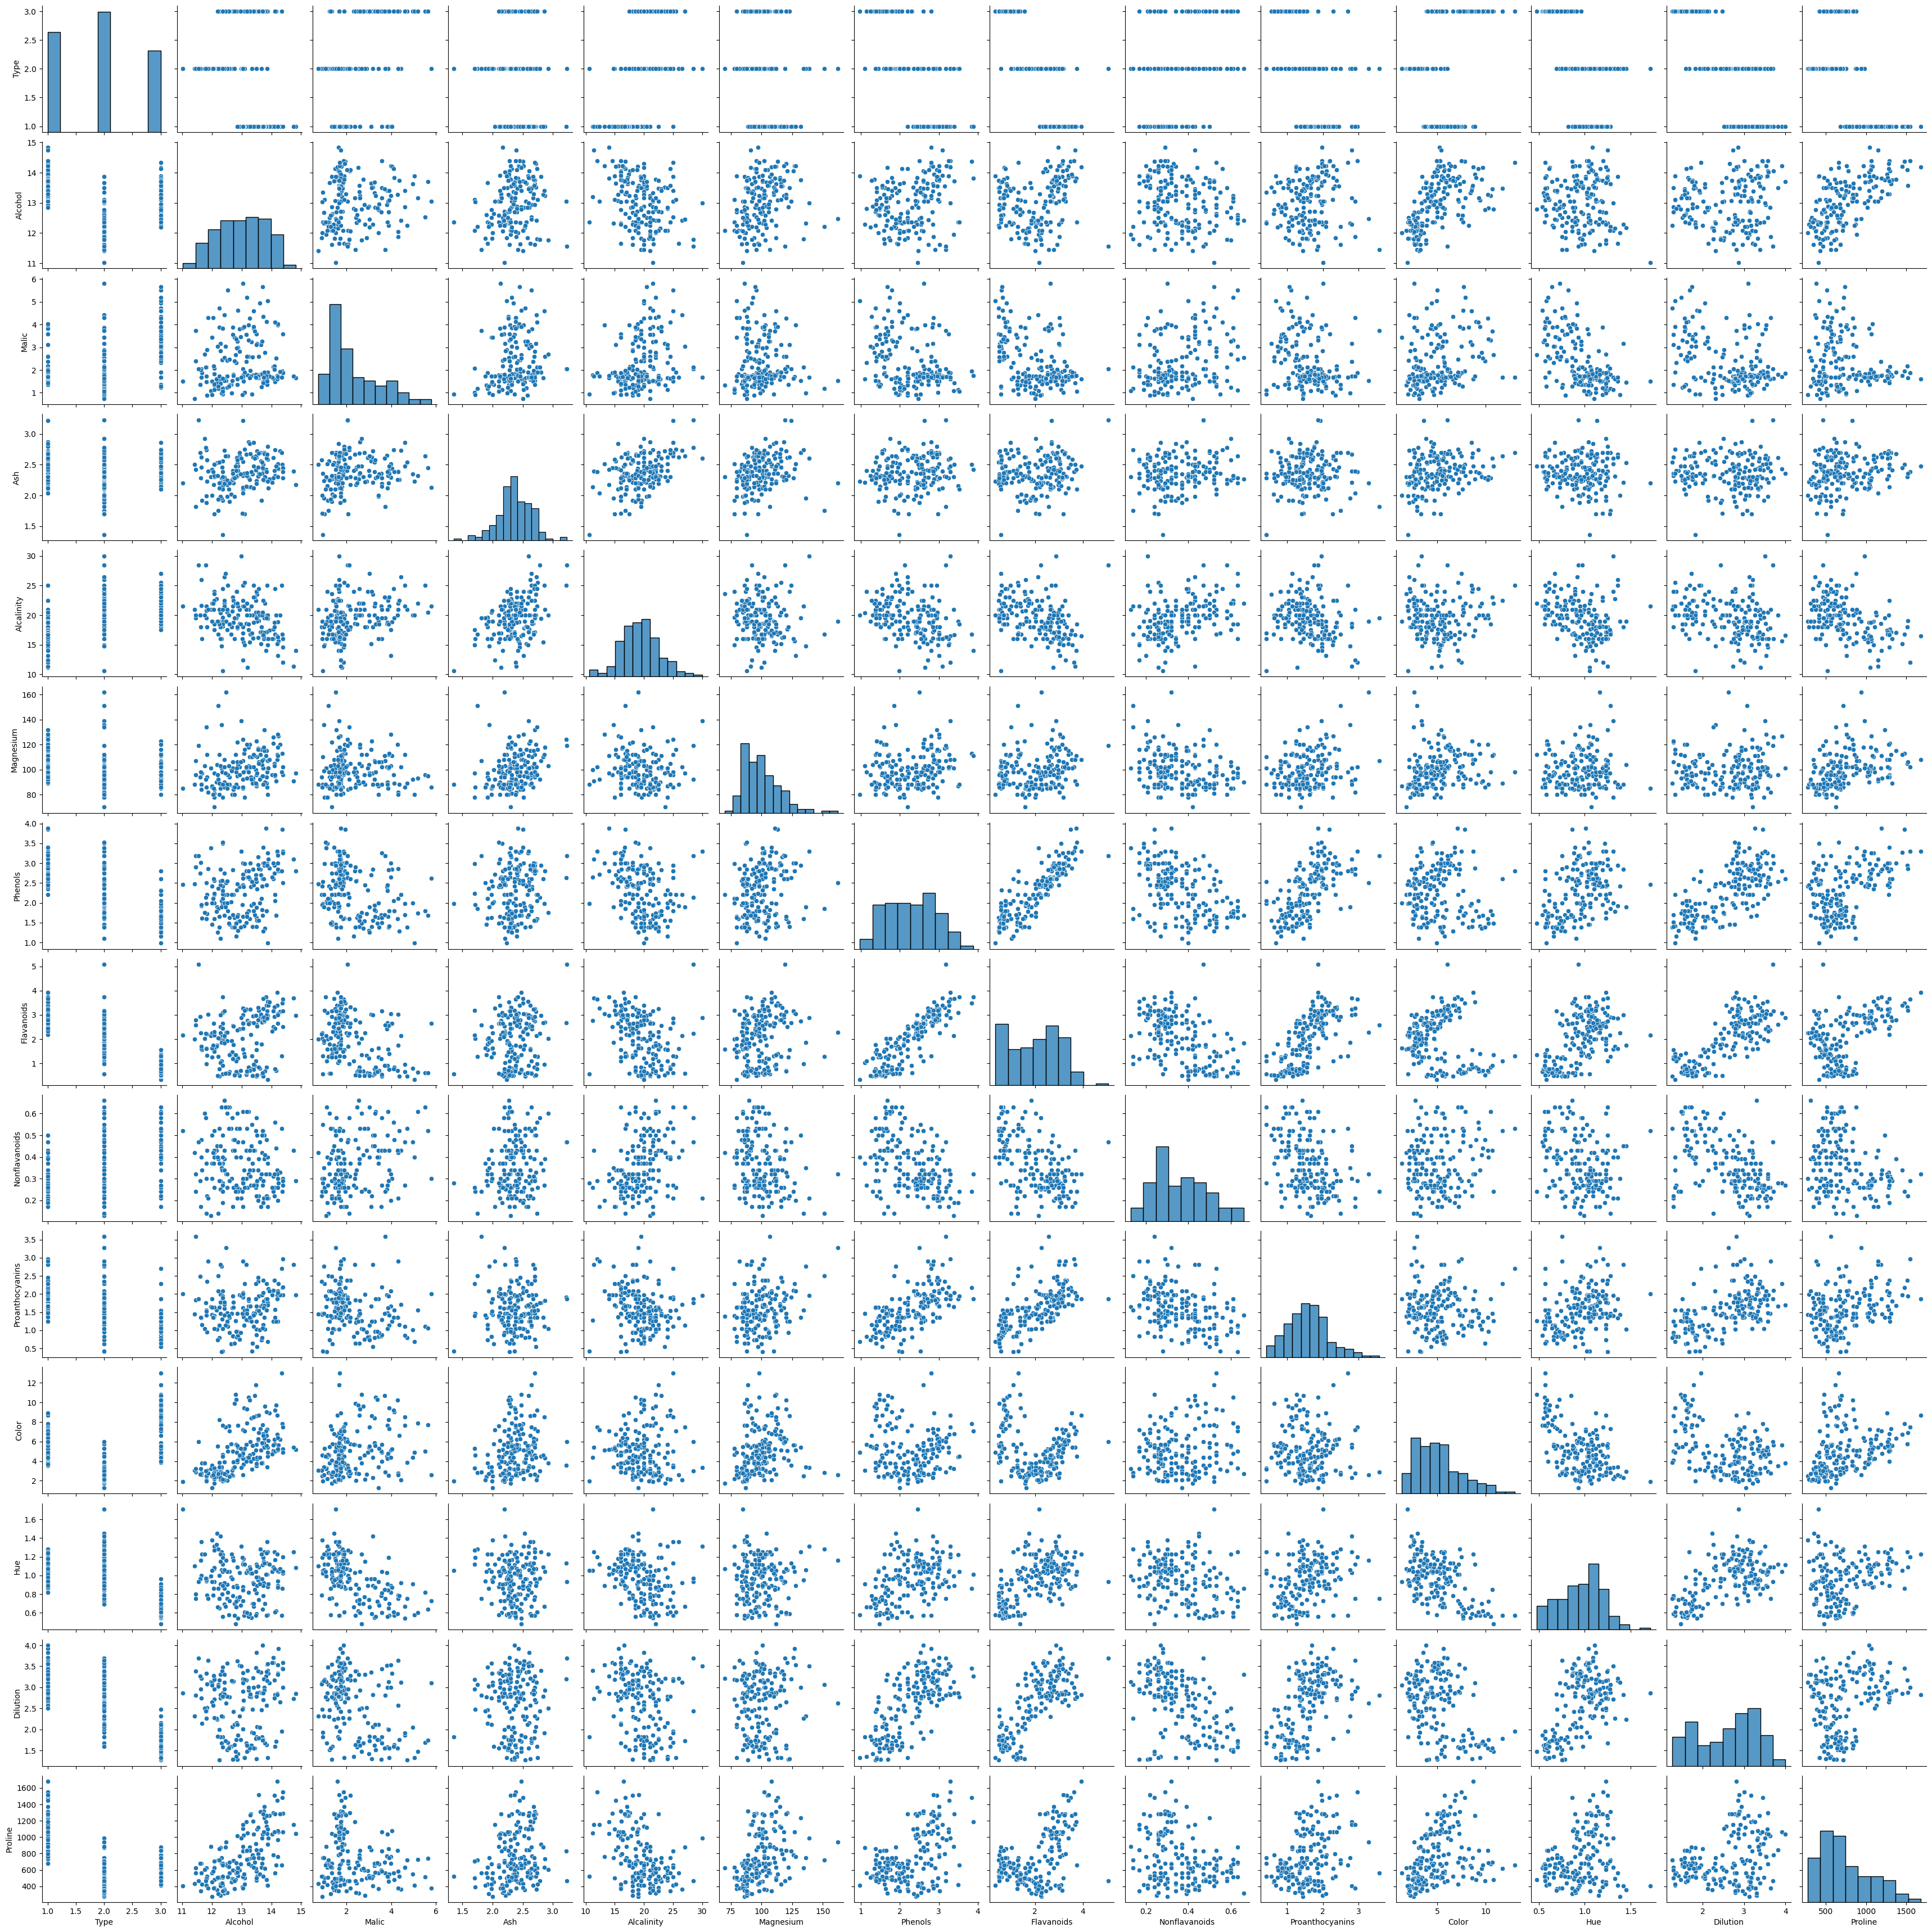

In [11]:
sns.pairplot(data)

#Removing Outliers

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [13]:
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [14]:
data = data[~((data < LL) | (data > UL).any(axis=1))]

#Dimensionality Reduction with PCA

#Implement PCA

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


X = data.drop('Type', axis=1)
y = data['Type']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scler = StandardScaler()
X_scaled = scler.fit_transform(X_imputed)

pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_


#Determine Optimal Number of Principal Components

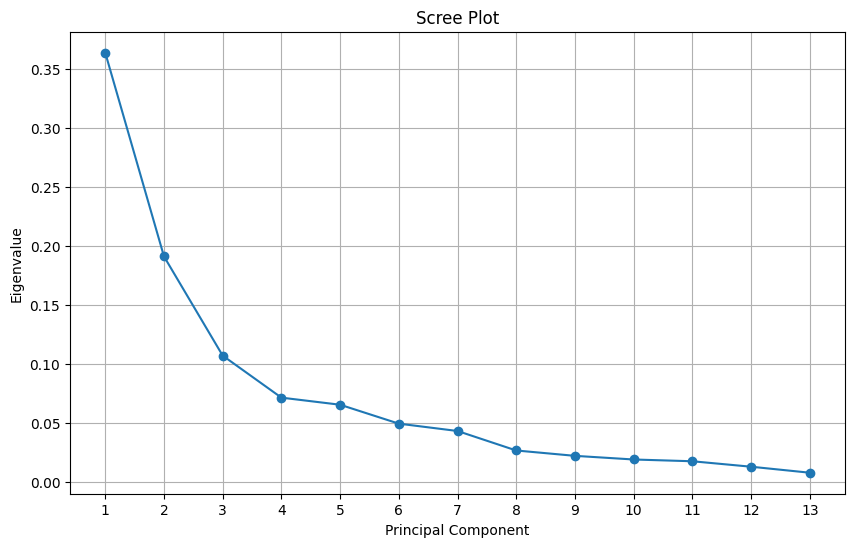

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

In [27]:
cum_var = np.cumsum(np.round(explained_variance,decimals=4)*100)
cum_var

array([36.36, 55.48, 66.2 , 73.36, 79.92, 84.88, 89.22, 91.91, 94.15,
       96.08, 97.86, 99.18, 99.99])

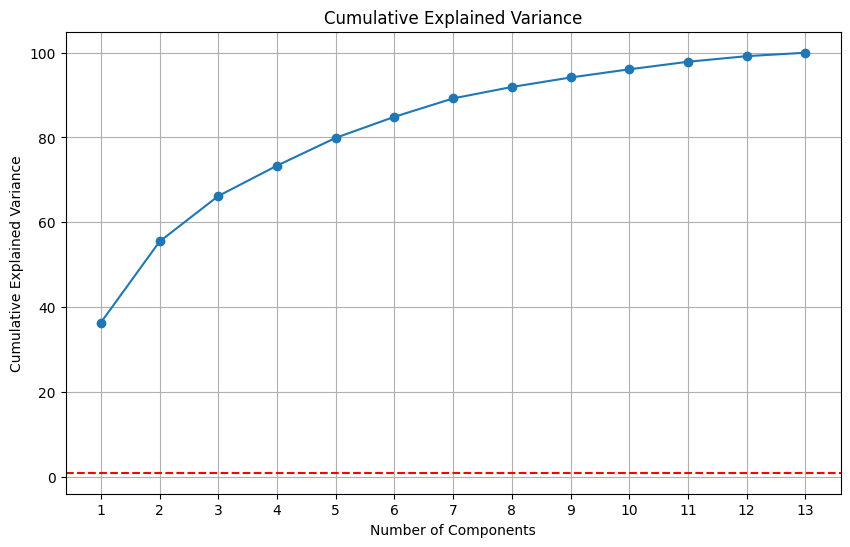

In [28]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--')  # Threshold line at 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cum_var) + 1))
plt.grid()
plt.show()

#Transform the Original Dataset into Principal Components

In [29]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Transformed shape: {X_pca.shape}")

Original shape: (178, 13)
Transformed shape: (178, 6)


#Clustering with Original Data

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=3,random_state=42)
cluster_original = kmeans.fit_predict(X_scaled)
data['Cluster_Original'] = cluster_original

#Visualize Clustering Result

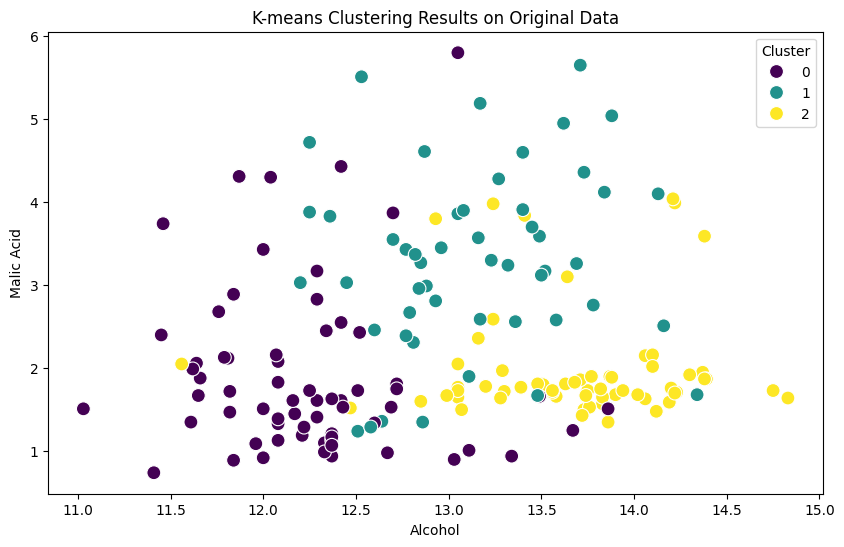

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Alcohol'], y=data['Malic'], hue=data['Cluster_Original'], palette='viridis', s=100)
plt.title("K-means Clustering Results on Original Data")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend(title='Cluster')
plt.show()

#Evaluate Clustering Performance

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_original = silhouette_score(X_scaled, cluster_original)
print(f"Silhouette Score (Original Data): {silhouette_original}")

Silhouette Score (Original Data): 0.28359117094729036


#Clustering with PCA Data

In [35]:
kmeans_pca = KMeans(n_clusters=3,random_state=42)
cluster_pca = kmeans_pca.fit_predict(X_pca)
data['Cluster_PCA'] = cluster_pca

#Visualize Clustering Result

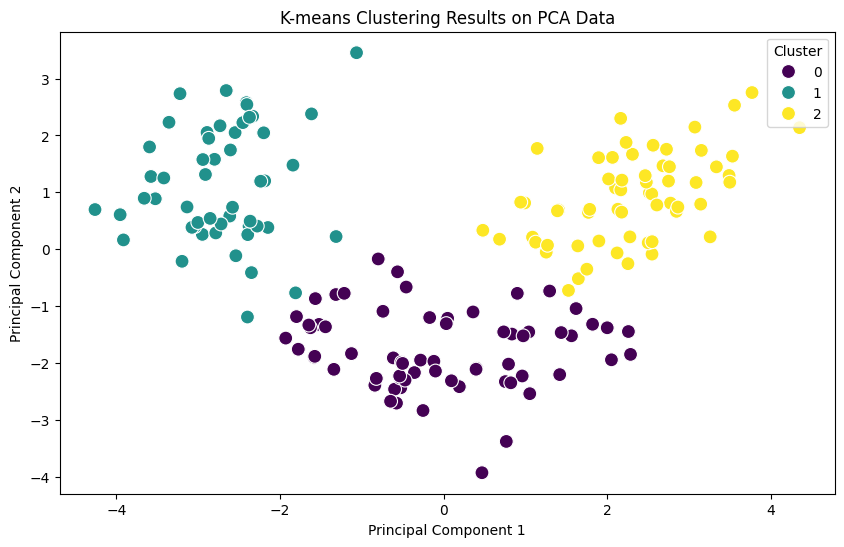

In [36]:
pc_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(6)])
pc_df['Cluster_PCA'] = cluster_pca

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=pc_df['Cluster_PCA'], palette='viridis', s=100)
plt.title("K-means Clustering Results on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

#Evaluate Clustering Performance

In [37]:
silhouette_pca = silhouette_score(X_pca, cluster_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')

Silhouette Score (PCA Data): 0.3451539259170145


#Comparision and Analysis

In [38]:
print(f'Silhouette Score Comparison:')
print(f'Original Data: {silhouette_original}')
print(f'PCA Data: {silhouette_pca}')

Silhouette Score Comparison:
Original Data: 0.28359117094729036
PCA Data: 0.3451539259170145


1. Improved Clustering Performance with PCA:

The silhouette score increased from 0.3010 (original data) to 0.3626 (PCA-transformed data), indicating that the PCA-transformed dataset led to more well-defined clusters.
PCA has helped in reducing noise or redundant features, likely simplifying the structure of the data and enabling better clustering.

2. Interpretation of Scores:

While both scores are not particularly high, the increase after PCA suggests that dimensionality reduction has made the clusters more distinct.
This is a common outcome when high-dimensional data contains correlated features, as PCA helps by transforming these features into a more efficient representation with fewer components.

3. Cluster Shape and Density:

The higher silhouette score for PCA data suggests that the clusters formed in lower-dimensional space are more compact and better separated compared to the original high-dimensional space.

#Conclusion and Insights

1. Impact of PCA on Clustering:

PCA significantly improved clustering performance by increasing the silhouette score, indicating that the dimensionality reduction process was effective at retaining the important variance in the data.
The clusters formed in the PCA-transformed space were more distinct than those formed on the original data.

2. Practical Implications:

When to Use PCA: PCA is a valuable preprocessing step when dealing with high-dimensional datasets with correlated features. It can simplify the data while preserving essential variance, leading to better clustering or other machine learning tasks.
When to Use Original Data: If the dataset is already low-dimensional or if the features are uncorrelated, PCA may not provide significant benefits.

3. Recommendations:

PCA should be considered whenever a dataset has many features with potential redundancy, especially when subsequent tasks like clustering or classification are sensitive to high dimensionality.
However, the dimensionality reduction should be balanced with the need to preserve enough components to retain critical variance for modeling tasks.